In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append('../../srcs')
import utils
import dataset
from keras_models import AttentionModel

Using TensorFlow backend.
/home/cenozai/mypy/git/AttentionPdM/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cenozai/mypy/git/AttentionPdM/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cenozai/mypy/git/AttentionPdM/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home

# Settings for data preprocessing

In [2]:
INPUR_DIR = '../../data/CMAPSSData'
TASK = 'regression'
WINDOW_SIZE = 30  # scanning window size
TRAIN_PROPORTION = 3 / 4  # proportion of the training data
CLIP_RUL = 100

# Load and preprocess data

In [3]:
data = dataset.TurbofanData(INPUR_DIR)
data.preprocess(clip_RUL=CLIP_RUL)
data.split_train_val(TRAIN_PROPORTION)
arrays = data.arrays_for_regression(WINDOW_SIZE)
train_x, train_y, test_x, test_y, val_x, val_y = arrays

Datasets FD_001, FD_002, FD_003, FD_004 are loaded succesfully!
Finish calculating RUL in FD_001.
Finish calculating RUL in FD_002.
Finish calculating RUL in FD_003.
Finish calculating RUL in FD_004.
Finish normalizing train and test sets.
FD_001: 75 train, 25 validation
FD_002: 195 train, 65 validation
FD_003: 75 train, 25 validation
FD_004: 186 train, 63 validation


# Instantiate model

In [4]:
load_from = '../../mlruns/0/18d81504b15d4f5ba752bb1e7cfb11ac/artifacts/model/data/model'
pdm_model = AttentionModel(task=TASK, load_from=load_from)
pdm_model._build_model()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Plot

In [5]:
def predict_and_plot(model, df: pd.DataFrame, window_size: int = WINDOW_SIZE):
    x, y, df_test = utils.to_array(df, window_size, True)
    pred = model._model.predict(x).flatten()
    df = df_test[['RUL', 'unit_number']].copy()
    df['error'] = pred - y
    df['pred'] = pred
    utils.plot_grouped_by_RUL(df, plt.plot,height=1.5, alpha=0.3, leg=False,
                              cols_data=['RUL', 'pred', 'error'])
    plt.hlines(0, df.RUL.max(), df.RUL.min() - 10, colors=['red'],
               linestyles='dashed')

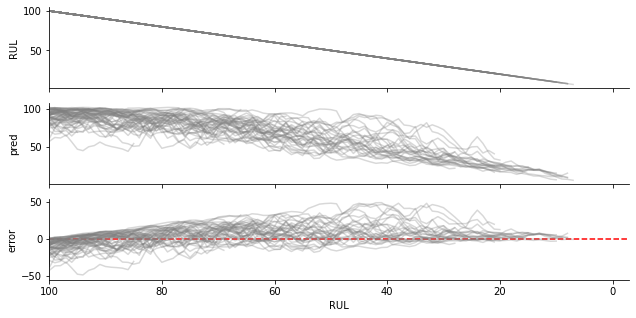

In [6]:
predict_and_plot(pdm_model, data['FD_001']['df_test'])

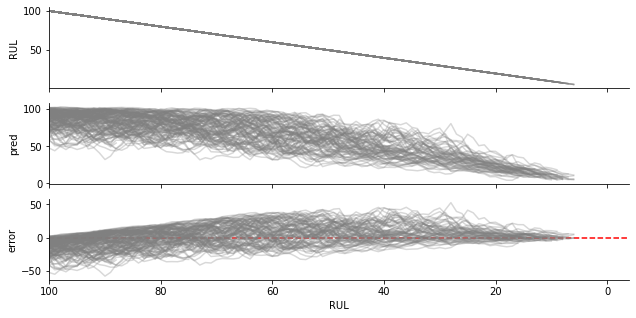

In [7]:
predict_and_plot(pdm_model, data['FD_002']['df_test'])

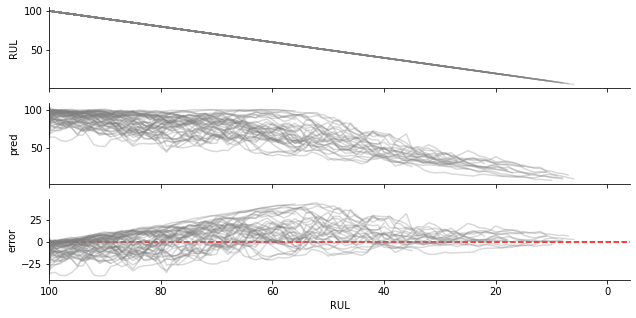

In [8]:
predict_and_plot(pdm_model, data['FD_003']['df_test'])

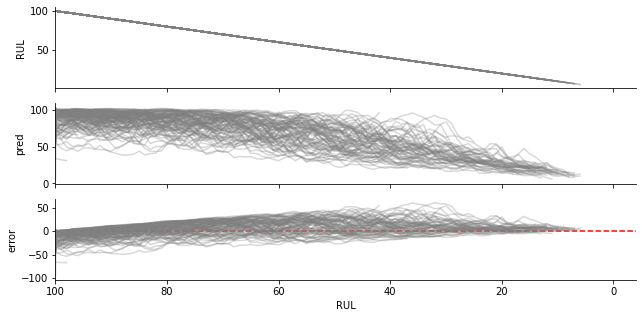

In [9]:
predict_and_plot(pdm_model, data['FD_004']['df_test'])